In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
from tools_analysis import corrcoef, coef_var
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import pandas as pd
import numpy as np
import quantities as pq
import seaborn as sns
from tools_plot import savefig, fix_figure, set_style, despine, add_caption, regplot, scatterplot
import copy
from IPython.display import display
from collections import defaultdict
from tqdm.notebook import tqdm_notebook as tqdm
tqdm.pandas()
import pathlib

from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
plt.rc('axes', titlesize=12)
plt.rcParams.update({
    'font.size': 12, 
    'figure.figsize': (6, 4), 
    'figure.dpi': 150
})

In [13]:
# p = pathlib.Path('../cluster/results/')
# path = pathlib.Path('../longrun_new/')
# path = pathlib.Path('../cluster/long_run_4000/')
# path = pathlib.Path('../results/')
# path = pathlib.Path('/media/storage_ssd/causal_opto_data/results_0/')
# path = pathlib.Path('/media/storage_hdd3T/causal_opto_data/container_results_branch_osc_poisson/results_0/')
# path = pathlib.Path('../test_strong_results/')
# path = pathlib.Path('/media/storage_hdd3T/causal_opto_data/stim_osc_const_100_a10/results_0')
path = pathlib.Path('/media/storage_hdd3T/causal_opto_data/stim_dependent_poisson_const_100_a10/results_0')

In [14]:
spikes_ex, spikes_in = [], []
for f in path.iterdir():
    if f.suffix == '.gdf':
        df = pd.read_csv(
            f, sep='\t', header=None).rename(columns={0:'sender', 1:'times'}).drop(columns=2)
        if f.stem.startswith('ex'):
            spikes_ex.append(df)
        else:
            spikes_in.append(df)
            
spikes_ex = pd.concat(spikes_ex)
spikes_in = pd.concat(spikes_in)

In [15]:
stim_data = np.load(path / 'stimulation_data_0.npz', allow_pickle=True)['data'][()]
stim_times = np.array(stim_data['times'])
stim_durations = np.array(stim_data['durations'])

In [16]:
spiketrains_ex = spikes_ex.groupby('sender')
spiketrains_in = spikes_in.groupby('sender')

In [17]:
import json
with open(str(path / 'params_0.json'), 'r') as f:
    params = json.load(f)

t_stop = params['status']['time']

In [18]:
stim_nodes = list(stim_data['stim_amps'].keys())

In [ ]:
np.zeros(10)rate_values[::2] = self.p['ac_rate']

(800.0, 1200.0)

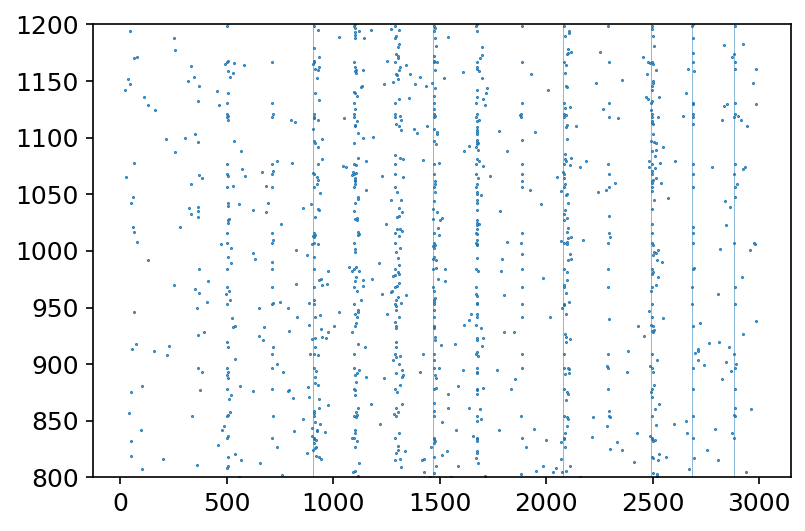

In [22]:
t1, t2 = 0, 3000

mask = (spikes_ex.times >= t1) & (spikes_ex.times <= t2)
mask_s = (stim_times >= t1) & (stim_times <= t2)

plt.scatter(spikes_ex.times[mask], spikes_ex.sender[mask], s=.2)
# plt.xlim(590,640)
for s, d in zip(stim_times[mask_s], stim_durations[mask_s]):
    plt.axvspan(s, s+d, alpha=.5)
plt.ylim(800, 1200)

In [20]:
a = np.arange(500, 2000, 200)
rate_times = a + np.random.uniform(-20, 20, len(a))
rate_times = rate_times.round(1)

In [36]:
np.random.uniform(0, 20, 10000).sum()

100711.98502677187

In [32]:
rate_times.shape

(8,)

In [33]:
rate_values = np.zeros(len(a))
rate_values[::-2] = 2

In [34]:
rate_times, rate_values

(array([ 512.4,  710.4,  901.1, 1117.8, 1308.8, 1502.5, 1712.3, 1906. ]),
 array([0., 2., 0., 2., 0., 2., 0., 2.]))

In [ ]:
plt.plot

In [ ]:
# sc << /rate_times [0.2 0.5] /rate_values [2.0 4.0] >> SetStatus
# The average firing rate of each realization of the Poisson process will be 
# 0.0 in the time interval [0, 0.2), 2.0 in the interval [0.2, 0.5) and 4.0 from then on.

In [19]:
conn = pd.read_feather(path / 'connections_0.feather')

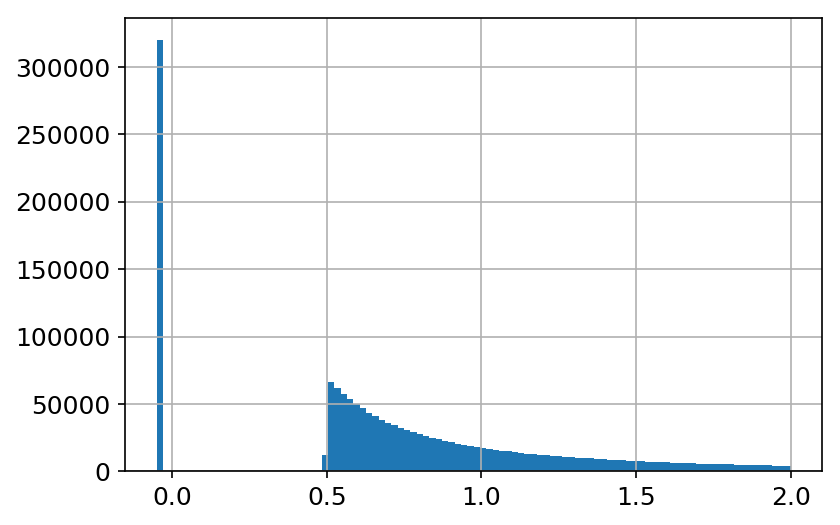

In [22]:
conn.weight.hist(bins=100)

In [24]:
conn.query('weight > 0').shape[0] / 3200

400.0

In [11]:
conn.loc[:,'source_stimulated'] = conn.source.isin(stim_nodes)
conn.loc[:,'target_stimulated'] = conn.target.isin(stim_nodes)
conn.loc[:,'target_ex'] = conn.target.isin(spikes_ex.sender.unique())
conn['stim_amp_source'] = conn.parallel_apply(
    lambda x: stim_data['stim_amps'].get(x.source, 0), axis=1)

VBox(children=(HBox(children=(IntProgress(value=0, description='0.00%', max=200000), Label(value='0 / 200000'))), HBox(children=(IntProgress(value=0, description='0.00%', max=200000), Label(value='0 / 200000'))), HBox(children=(IntProgress(value=0, description='0.00%', max=200000), Label(value='0 / 200000'))), HBox(children=(IntProgress(value=0, description='0.00%', max=200000), Label(value='0 / 200000'))), HBox(children=(IntProgress(value=0, description='0.00%', max=200000), Label(value='0 / 200000'))), HBox(children=(IntProgress(value=0, description='0.00%', max=200000), Label(value='0 / 200000'))), HBox(children=(IntProgress(value=0, description='0.00%', max=200000), Label(value='0 / 200000'))), HBox(children=(IntProgress(value=0, description='0.00%', max=200000), Label(value='0 / 200000')))))

In [12]:
np.min(np.diff(stim_times))

19.0

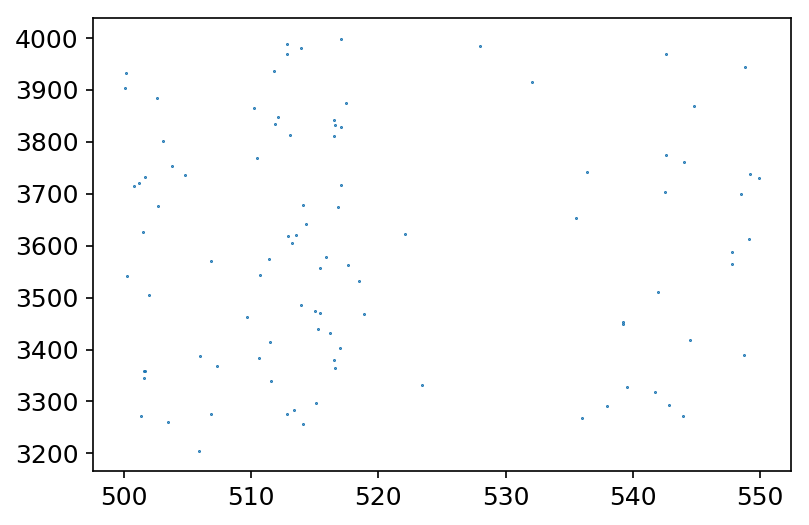

In [13]:
t1, t2 = 500, 550

mask = (spikes_in.times >= t1) & (spikes_in.times <= t2)
mask_s = (stim_times >= t1) & (stim_times <= t2)

plt.scatter(spikes_in.times[mask], spikes_in.sender[mask], s=.2)
# plt.xlim(590,640)
for s, d in zip(stim_times[mask_s], stim_durations[mask_s]):
    plt.axvspan(s, s+d, alpha=.5)

In [14]:
start_ai = 100
stop_ai = 500
duration = stop_ai - start_ai

In [15]:
def sslice(x, x1, x2):
    idx = np.searchsorted(x, [x1, x2], side='right')
    return x[idx[0]: idx[1]]

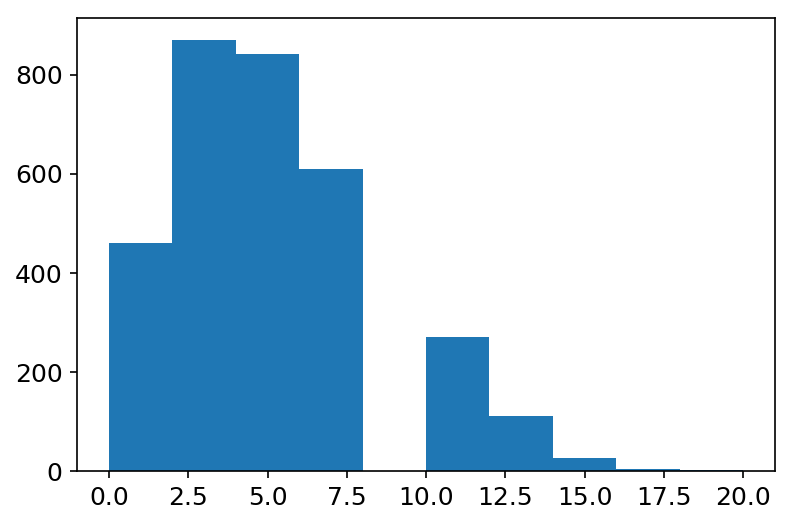

In [16]:
plt.hist([len(sslice(s.times, start_ai, stop_ai)) / (duration / 1000) 
          for i, s in spiketrains_ex]);

In [17]:
# fig, ax = plt.subplots(1, 2)


# binsize_corr = 2.
# spiketrains_list = [
#     s.times[(s.times > start_ai) & (s.times < stop_ai)] for i, s in spiketrains_ex
# ]

# cc = corrcoef(
#     np.random.choice(spiketrains_list, 400), t_stop, binsize=binsize_corr)

# cc = cc[np.triu_indices(len(cc), k=1)]
# cc = cc[~np.isnan(cc)]
# ax[0].hist(cc, bins=100);


# cv = np.array(coef_var(spiketrains_list))
# cv = cv[~np.isnan(cv)]

# ax[1].hist(cv, bins=100);

# stim related

In [45]:
def make_trials(stim_times, spikes, t1, t2):
    trials = []
    for i, t in enumerate(stim_times):
        idx = np.searchsorted(spikes, [t + t1, t + t2], side='right')
        trials.append(spikes[idx[0]: idx[1]] - t)
    return trials

In [46]:
def compute_stim_response(stim_times, spikes, x1, x2):
    stim_win = np.insert(
        stim_times + x1,
        np.arange(len(stim_times)) + 1,
        stim_times + x2)
    src_y = np.searchsorted(spikes, stim_win, side='right')
    cnt_y = np.diff(src_y.reshape((int(len(src_y) / 2), 2)))
    Y = cnt_y.flatten()
    return Y.astype(bool).astype(int)

In [47]:
def plot_density(trials, sigma, raster=False, shade=None, **kwargs):
    from scipy.stats import gaussian_kde
    spikes = [a for b in trials for a in b]
    kernel = gaussian_kde(spikes, sigma)
    times = np.arange(0, 15, 0.01)
    plt.plot(times, kernel(times), **kwargs)
    
    if raster:
        trial_ids = [a for i, b in enumerate(trials) for a in [i] * len(b)]
        plt.scatter(spikes, trial_ids, s=1)
    if shade is not None:
        plt.axvspan(*shade, color='cyan', alpha=.3)
#         plt.axvspan(3, 8, color='r', alpha=.3)

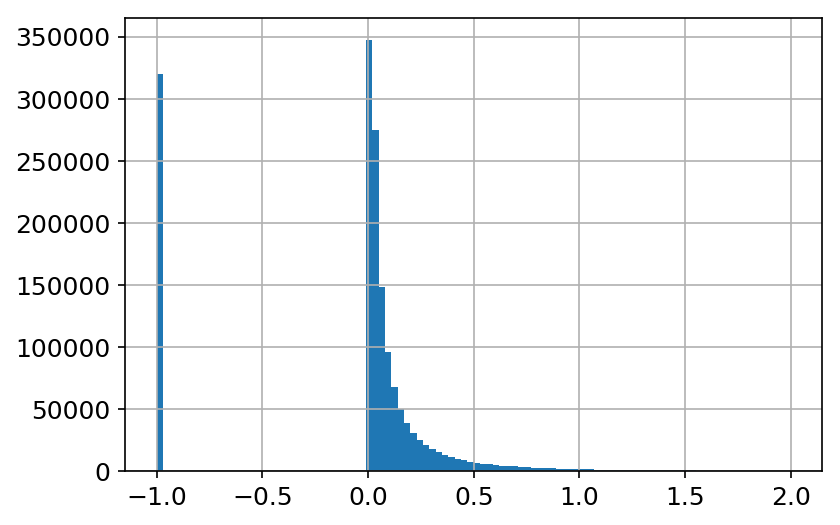

In [16]:
conn.weight.hist(bins=100)

In [17]:
conn.query('weight < 1e-3 and weight > 0').shape#.weight.hist()
# plt.xticks(rotation=45)

(8737, 7)

In [18]:
conn.query('source_stimulated and not target_stimulated').sort_values(['weight'], ascending=True).head()

,weight,source,target,source_stimulated,target_stimulated,target_ex,stim_amp_source
997799,0.000036,2496,2734,True,False,True,4.055451
925857,0.000049,2317,2114,True,False,True,5.440089
436750,0.000063,1094,885,True,False,True,7.429318
819589,0.000065,2051,1081,True,False,True,3.530394
1188488,0.000070,2973,489,True,False,True,4.684627


In [53]:
# Connected
# A, C = 148, 934
# A, C = 1070, 2371

# Not connected
A, C = 1094, 885
# A, C = 2973, 489

In [54]:
A_spikes = spiketrains_ex.get_group(A).times
C_spikes = spiketrains_ex.get_group(C).times

In [55]:
C_trials = np.array(make_trials(stim_times, C_spikes, -4, 15))

In [56]:
A_trials = np.array(make_trials(stim_times, A_spikes, -4, 15))

In [60]:
z1=-2
z2=0
x1=1
x2=3
y1=3
y2=7
    
Z = compute_stim_response(stim_times, A_spikes, z1, z2)
X = compute_stim_response(stim_times, A_spikes, x1, x2)
Y = compute_stim_response(stim_times, C_spikes, y1, y2)

In [61]:
sum(Z)

227

Text(0.5,1,'beta_iv = 0.1499, beta = 0.0789')

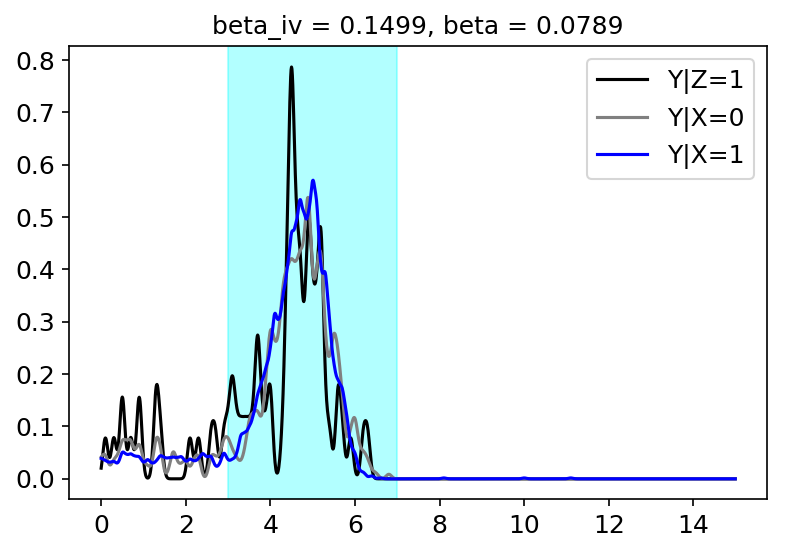

In [64]:
sigma = 0.03
plot_density(C_trials[Z==1], sigma, color='k', label='Y|Z=1')
plot_density(C_trials[X==0], sigma, color='grey', label='Y|X=0')
plot_density(C_trials[X==1], sigma, color='b', shade=[y1, y2], label='Y|X=1')
# plot_density(A_trials, 0.01, color='y', shade=[x1, x2], label='X')
plt.legend()
beta = Y[X==1].mean() - Y[X==0].mean()
beta_iv = Y[X==1].mean() - Y[Z==1].mean()
plt.title('beta_iv = {:.4f}, beta = {:.4f}'.format(beta_iv, beta))

In [63]:
# x1 = 1
# x2 = 3
# hit_rates = [compute_stim_response(s.times, stim_times,  x1, x2).mean()
#              for i, s in spiketrains_ex 
#              if s.sender.iloc[0] in stim_data['stim_nodes']['ex']]


# fig, ax = plt.subplots(1, 2)

# amps = np.array(list(stim_data['stim_amps']['ex'].values()))
# ax[0].hist(amps, bins=np.unique(amps))
# ax[0].set_xlabel('Stim amps')

# ax[1].hist(hit_rates)
# ax[1].set_xlabel('Hit rate')

# look at all

In [100]:
N = 200
# query = 'stim_amp_source > 600 and stim_amp_source < 800 and weight > 0 and not target_stimulated and target_ex'
query = 'weight > 0 and not target_stimulated and target_ex and stim_amp_source > 1'
sample = conn.query(query)


In [101]:
sample.sort_values('weight', ascending=False).head()

,weight,source,target,source_stimulated,target_stimulated,target_ex,stim_amp_source
392114,1.999961,982,464,True,False,True,3.998598
427045,1.999399,1070,2371,True,False,True,6.446569
59135,1.998839,148,934,True,False,True,13.958643
1235988,1.998560,3091,2301,True,False,True,4.754098
341139,1.998538,855,581,True,False,True,3.781164


In [102]:
sample['wr'] = sample.weight.round(3)
sample = sample.drop_duplicates('wr')

# sample = sample.sample(2000)

/home/mikkel/.virtualenvs/main/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


1978


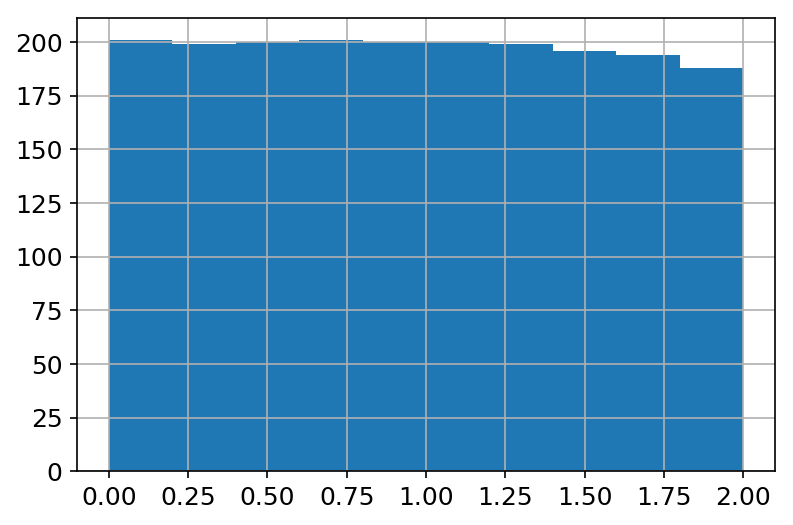

In [103]:
print(len(sample))
sample.weight.hist()

In [104]:
def process(row):
    source = spiketrains_ex.get_group(int(row.source)).times
    target = spiketrains_ex.get_group(int(row.target)).times
    z = compute_stim_response(stim_times, source, z1, z2)
    x = compute_stim_response(stim_times, source, x1, x2)
    y = compute_stim_response(stim_times, target, y1, y2)
    
#     y_d = compute_stim_response(stim_times, target, 20, 24)
    
    y_ref = y[z==1]
#     print(len(y_ref))
    y_respons = y[x==1].mean()
    
#     # standard iv
    beta_iv = y_respons - y_ref.mean()
#     # corrected
#     beta_iv = y_respons - y_ref.mean() + y_d[x==1].mean() - y_d[z==1].mean()
    # DiD corrected
#     beta_iv = y_respons - y_ref.mean() - y_d[x==1].mean() + y_d[z==1].mean()
    # wald
#     beta_iv = (y[z==1].mean() - y[z==0].mean()) / (x[z==1].mean() - x[z==0].mean())
    beta = y_respons - y[x==0].mean()
#     beta = y_respons - np.random.choice(y[x==0], len(y_ref)).mean()
#     return pd.Series({'beta_iv': beta_iv, 'beta': beta, 'hit_rate': x.mean(), 'wald': wald})
    return pd.Series({'beta_iv': beta_iv, 'beta': beta, 'hit_rate': x.mean()})

In [105]:
process(sample.iloc[0,:])

beta       -0.021397
beta_iv     0.143384
hit_rate    0.616700
dtype: float64

In [106]:
from multiprocessing import  Pool

def parall_apply(df, func, n_cores=8):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df


def apply(x): 
    return x.apply(process, axis=1, result_type="expand")

In [107]:
# result = sample.join(sample.progress_apply(process, axis=1, result_type="expand"))
result = sample.join(parall_apply(sample, apply))

In [108]:
result.beta_iv.shape, result.beta_iv.dropna().shape

((1978,), (1978,))

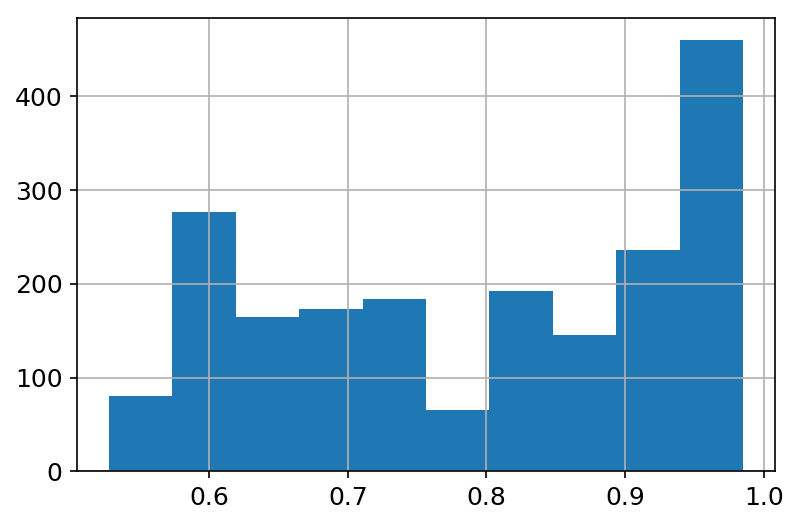

In [109]:
result.hit_rate.hist()

Text(0,0.5,'$\\hat{\\beta}_{IV}$')

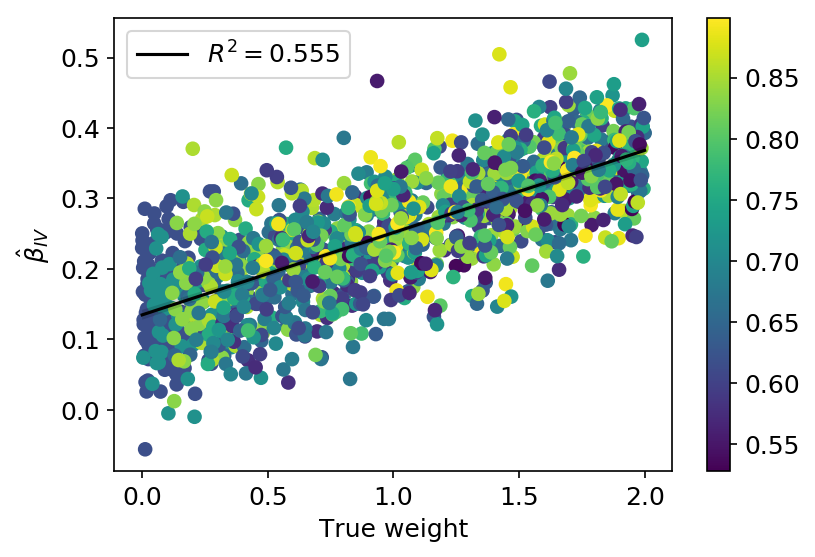

In [110]:
df_ = result.query('hit_rate > 0.1 and hit_rate < .9')
model = regplot(
    'weight', 'beta_iv', data=df_, 
    scatter_color=df_['hit_rate'], colorbar=True)

h = plt.Line2D([], [], label='$R^2 = {:.3f}$'.format(model.rsquared), ls='-', color='k')
plt.gca().legend(handles=[h])

plt.xlabel('True weight')
plt.ylabel(r'$\hat{\beta}_{IV}$')

Text(0,0.5,'$\\hat{\\beta}$')

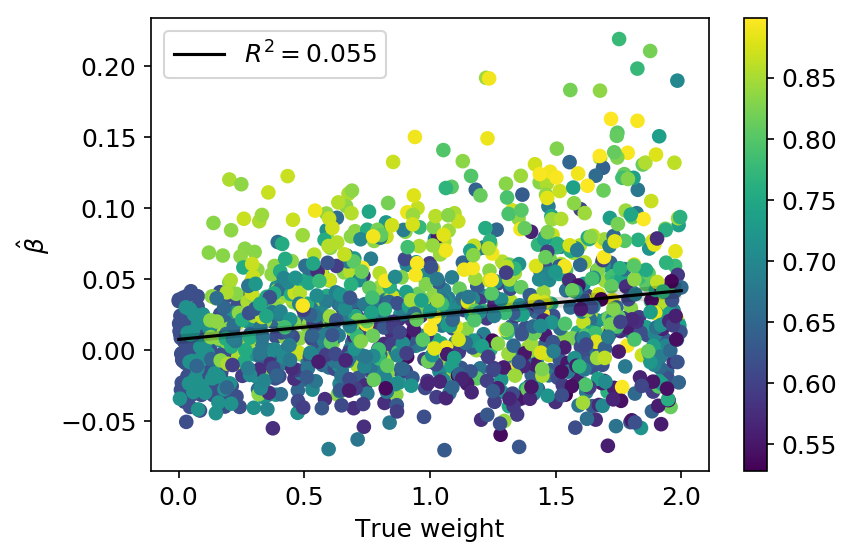

In [111]:
df_ = result.query('hit_rate > .1 and hit_rate < .9')
model = regplot(
    'weight', 'beta', data=df_, 
    scatter_color=df_['hit_rate'], colorbar=True)

h = plt.Line2D([], [], label='$R^2 = {:.3f}$'.format(model.rsquared), ls='-', color='k')
plt.gca().legend(handles=[h])

plt.xlabel('True weight')
plt.ylabel(r'$\hat{\beta}$')

Text(0,0.5,'$\\hat{\\beta}$')

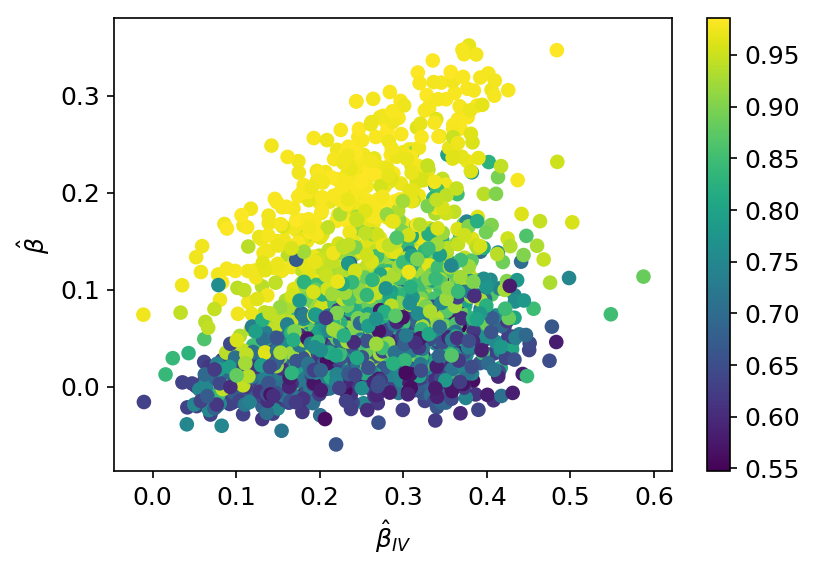

In [44]:
scatterplot(
    'beta_iv', 'beta', data=result, 
    scatter_color=result['hit_rate'], colorbar=True)

plt.xlabel(r'$\hat{\beta}_{IV}$')
plt.ylabel(r'$\hat{\beta}$')

Text(0,0.5,'True weight')

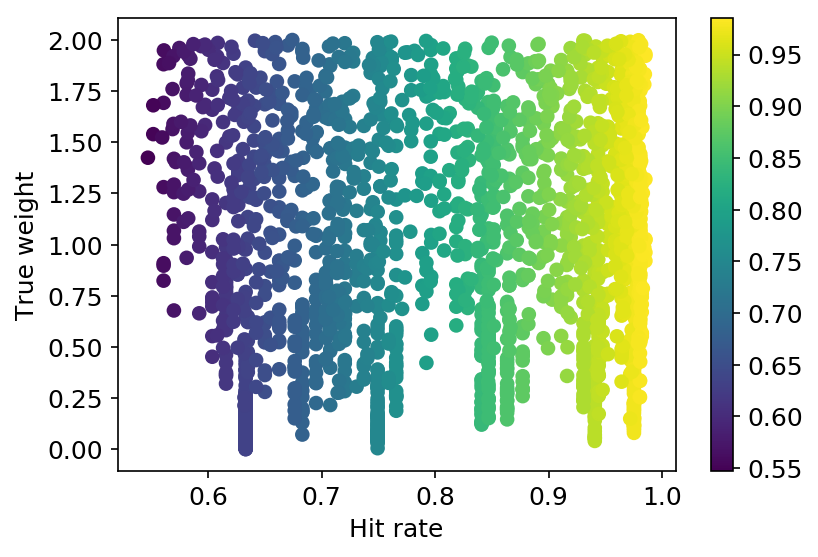

In [45]:
scatterplot(
    'hit_rate', 'weight', data=result, 
    scatter_color=result['hit_rate'], colorbar=True)


plt.xlabel('Hit rate')
plt.ylabel('True weight')

Text(0,0.5,'$\\hat{\\beta}_{IV}$')

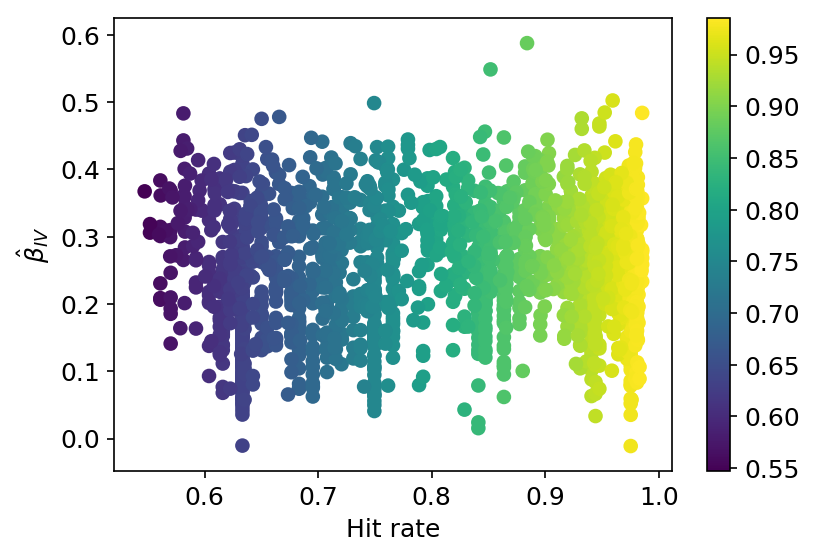

In [46]:
scatterplot(
    'hit_rate', 'beta_iv', data=result, 
    scatter_color=result['hit_rate'], colorbar=True)

plt.xlabel(r'Hit rate')
plt.ylabel(r'$\hat{\beta}_{IV}$')

Text(0,0.5,'$\\hat{\\beta}$')

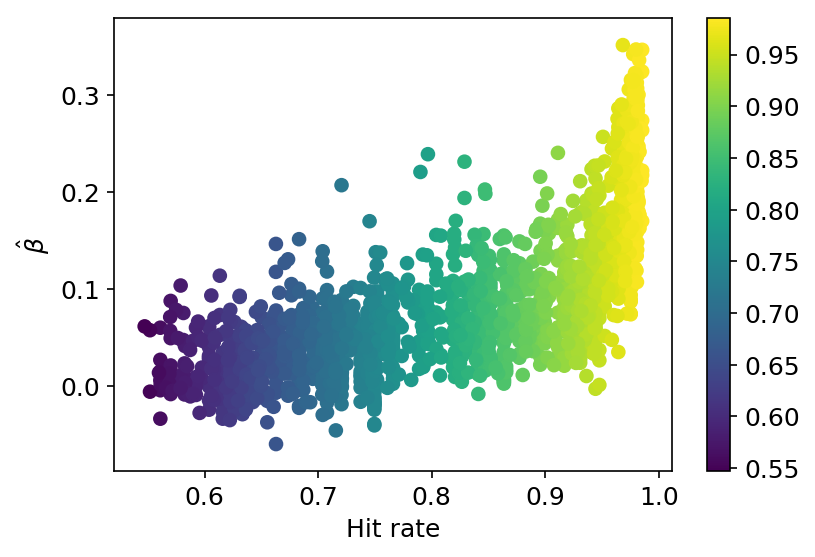

In [47]:
scatterplot(
    'hit_rate', 'beta', data=result, 
    scatter_color=result['hit_rate'], colorbar=True)

plt.xlabel(r'Hit rate')
plt.ylabel(r'$\hat{\beta}$')

Text(0.5,0,'source')

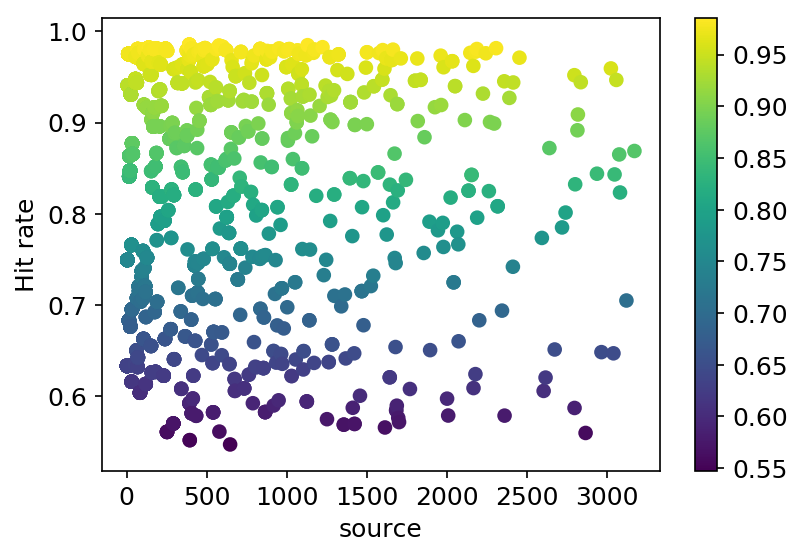

In [48]:
model = scatterplot(
    'source', 'hit_rate', data=result, 
    scatter_color=result['hit_rate'], colorbar=True)

plt.ylabel(r'Hit rate')
plt.xlabel(r'source')

# zero weight

In [49]:
N = 200
query = 'weight < 0.001 and weight >= 0 and not target_stimulated and target_ex'
sample_zero = conn.query(query)

In [50]:
sample_zero = sample_zero.sample(2000)

In [51]:
result_zero = sample_zero.join(parall_apply(sample_zero, apply))

([<matplotlib.axis.XTick at 0x7fae25b1eeb8>,
 <a list of 2 Text xticklabel objects>)

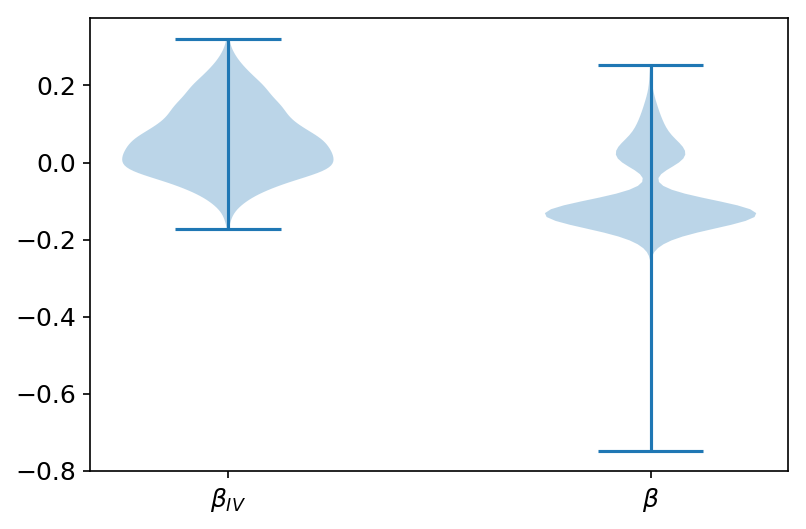

In [52]:
plt.violinplot(result_zero.dropna().loc[:, ['beta_iv', 'beta']].T)
plt.xticks([1, 2], [r'$\beta_{IV}$', r'$\beta$'])